among over 3000 decision tree models created and trained, the best candidate with highest accuracy (acc~78%) on random oversampling dataset has the following hyperparameters: 
- [max_features, min_sample_leaf, max_depth, splitter]
- [None, 5, 20, 'best']


## import libraries


In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import RocCurveDisplay 

import warnings 
warnings.filterwarnings('ignore')

## load dataset

In [2]:
# load random oversampling data
X_ros_train = pd.read_csv('data/ros/X_ros_train.csv')
X_ros_test = pd.read_csv('data/ros/X_ros_test.csv')

y_ros_train = pd.read_csv('data/ros/y_ros_train.csv')
y_ros_test = pd.read_csv('data/ros/y_ros_test.csv')

## train the best model

In [4]:
MAX_FEATURES = None 
MIN_SAMPLE_LEAF = 5
MAX_DEPTH = 20 
SPLITTER = 'best'

In [5]:
# create model
model_dtc = DecisionTreeClassifier(
    splitter=SPLITTER, max_depth=MAX_DEPTH, 
    min_samples_leaf=MIN_SAMPLE_LEAF, 
    max_features=MAX_FEATURES)

In [7]:
# train the model
history = model_dtc.fit(X_ros_train, y_ros_train)

In [10]:
display(history)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)

## evaluate the model

In [8]:
y_pred = model_dtc.predict(X_ros_test)
accuracy = accuracy_score(y_true=y_ros_test, y_pred=y_pred)

In [11]:
print(f'{accuracy = }')

accuracy = 0.7830325529160362


<AxesSubplot: >

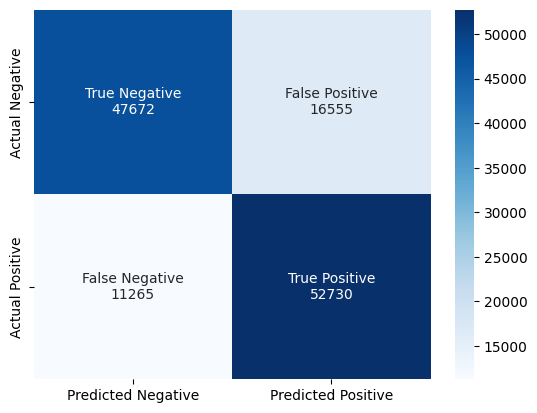

In [12]:
cf_matrix = confusion_matrix(y_true=y_ros_test, y_pred=y_pred)

# preparing the labels
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
values = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten() ]
annotations = [f'{v1}\n{v2}' for v1, v2 in zip(labels, values)]
annotations = np.asarray(annotations).reshape(2, 2)
axxlabels = ['Predicted Negative', 'Predicted Positive']
axylabels = ['Actual Negative', 'Actual Positive']


# plotting the confusion matrix
sns.heatmap(cf_matrix, annot=annotations, 
            fmt='', xticklabels=axxlabels, yticklabels=axylabels, 
            cmap=sns.color_palette('Blues', as_cmap=True))

In [13]:
# calculate accuracy, sensitivity & specifity
tn = cf_matrix.flatten()[0] # true negative
fp = cf_matrix.flatten()[1] # false positive
fn = cf_matrix.flatten()[2] # false negative
tp = cf_matrix.flatten()[3] # true positive

accuracy_score = (tp + tn) / (tn + fp + fn + tp) * 100
tpr = (tp / (tp + fn)) * 100
tnr = (tn / (tn + fp)) * 100

print(f'accuracy score is {accuracy_score}')
print(f'true positive rate is {tpr}')
print(f'true negative rate is {tnr}')

accuracy score is 78.30325529160362
true positive rate is 82.39706227048988
true negative rate is 74.22423591324521


it seems that the model does a good job predicting positive classes however it predicts the negative class with 74% rate. the overal accuracy of the model is 78%. 

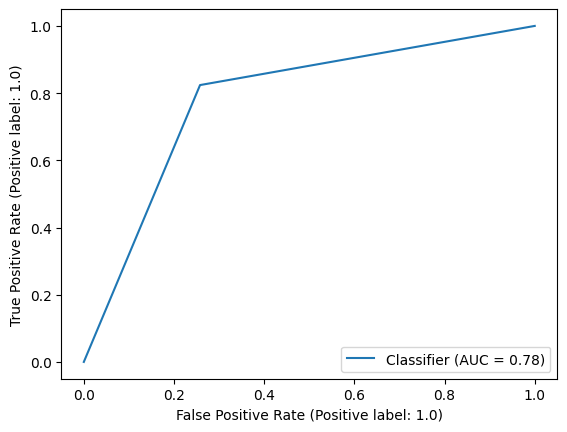

In [15]:
RocCurveDisplay.from_predictions(y_true=y_ros_test, y_pred=y_pred, pos_label=1.0)